#Data Preprocessing


In [1]:
import pandas as pd
df = pd.read_csv('data_generated.csv')

col = df.columns.tolist()
print("The list of all columns:")
print(col)

print("\n Display the dataset \n")
df.head()

The list of all columns:
['Satisfaction_Score', 'Performance_Score', 'Realised_Project', 'Montly_Hours', 'Tenure', 'Work_accident', 'Employment_status', 'Promotion_History', 'Department', 'Salary', 'Bonus', 'Job_level']

 Display the dataset 



,Satisfaction_Score,Performance_Score,Realised_Project,Montly_Hours,Tenure,Work_accident,Employment_status,Promotion_History,Department,Salary,Bonus,Job_level
0,0.9,9.5,6,304,4,0,1,0,sales,low,1,Senior_Level
1,0.9,6.2,6,294,4,0,1,0,accounting,low,0,Entry_Level
2,0.9,8.9,6,276,4,0,1,0,technical,low,1,Entry_Level
3,0.9,7.7,5,275,4,0,1,0,product_mng,medium,1,Senior_Level
4,0.9,8.7,7,295,4,0,1,0,product_mng,low,0,Entry_Level


### There are 3 categorical features. One is Department, Job_level and Salary.

In [2]:
df.dtypes


Satisfaction_Score    float64
Performance_Score     float64
Realised_Project        int64
Montly_Hours            int64
Tenure                  int64
Work_accident           int64
Employment_status       int64
Promotion_History       int64
Department             object
Salary                 object
Bonus                   int64
Job_level              object
dtype: object

In [3]:
df.isnull().any()

# checking for missing value


Satisfaction_Score    False
Performance_Score     False
Realised_Project      False
Montly_Hours          False
Tenure                False
Work_accident         False
Employment_status     False
Promotion_History     False
Department            False
Salary                False
Bonus                 False
Job_level             False
dtype: bool

Our data is clean. There are no missing and null values.

In [4]:
df.shape


(15999, 12)

We have a total of 15999 observations

In [5]:
df.describe()


,Satisfaction_Score,Performance_Score,Realised_Project,Montly_Hours,Tenure,Work_accident,Employment_status,Promotion_History,Bonus
count,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000
mean,6.057935,7.028133,3.911994,201.471029,3.589974,0.165948,0.255016,0.050253,0.531533
std,2.547152,1.906156,1.456759,50.991791,1.655893,0.372045,0.435884,0.218474,0.499020
min,0.000000,0.000000,1.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,5.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,6.400000,7.100000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,8.100000,8.700000,5.000000,246.000000,4.000000,0.000000,1.000000,0.000000,1.000000
max,10.000000,10.000000,10.000000,320.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['Department'].unique()


array(['sales', 'accounting', 'technical', 'product_mng', 'hr', 'support',
       'IT', 'RandD', 'marketing', 'management', 'Supply_Chain',
       'Logistic', 'Quality_Assurance', 'Legal_Compliance'], dtype=object)

As we can see, there are 14 departments

#**Exploratory Data Analysis**`

In [7]:
# counting the number of employee left and stayed

df['Employment_status'].value_counts()


Employment_status
0    11919
1     4080
Name: count, dtype: int64

Out of 15999 employees, 4080 left the company

In [8]:
df.groupby('Employment_status').mean(numeric_only= True)


,Satisfaction_Score,Performance_Score,Realised_Project,Montly_Hours,Tenure,Work_accident,Promotion_History,Bonus
Employment_status,,,,,,,,
0,6.594513,7.060265,3.867606,199.468747,3.445843,0.189278,0.044719,0.521017
1,4.490417,6.934265,4.041667,207.320343,4.011029,0.097794,0.066422,0.562255


In [9]:
df.groupby('Department').mean(numeric_only= True)


,Satisfaction_Score,Performance_Score,Realised_Project,Montly_Hours,Tenure,Work_accident,Employment_status,Promotion_History,Bonus
Department,,,,,,,,,
IT,6.181418,7.168297,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.493888
Legal_Compliance,5.101887,4.913208,5.547170,212.686792,5.041509,0.483019,0.520755,0.516981,1.000000
Logistic,4.875000,4.883333,5.420833,209.370833,5.125000,0.450000,0.479167,0.483333,1.000000
Quality_Assurance,5.178423,5.078838,5.473029,201.074689,4.850622,0.526971,0.518672,0.485477,1.000000
RandD,6.198221,7.121220,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.522236
Supply_Chain,4.850394,5.263780,5.732283,207.523622,4.846457,0.484252,0.515748,0.452756,1.000000
accounting,5.821512,7.177184,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.512386
hr,5.988092,7.088498,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.519621
management,6.213492,7.240000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.490476


In [10]:
df.groupby('Salary').mean(numeric_only= True)


,Satisfaction_Score,Performance_Score,Realised_Project,Montly_Hours,Tenure,Work_accident,Employment_status,Promotion_History,Bonus
Salary,,,,,,,,,
high,6.068802,6.618580,4.121116,201.279011,4.006975,0.227013,0.162968,0.154090,0.611921
low,5.974238,7.080989,3.880283,201.488159,3.503206,0.156352,0.304854,0.030747,0.521915
medium,6.149771,7.063815,3.899100,201.496386,3.590795,0.162561,0.220239,0.048090,0.523676


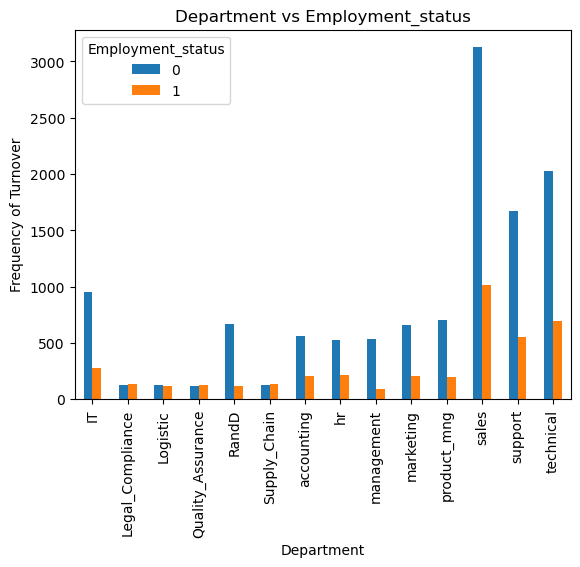

In [11]:
import matplotlib.pyplot as plt

# creation of bar char

pd.crosstab(df.Department,df.Employment_status).plot(kind='bar')
plt.title('Department vs Employment_status')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

/tmp/ipykernel_5181/3553676841.py:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('salary_bar_chart')
/home/elcaskerito/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


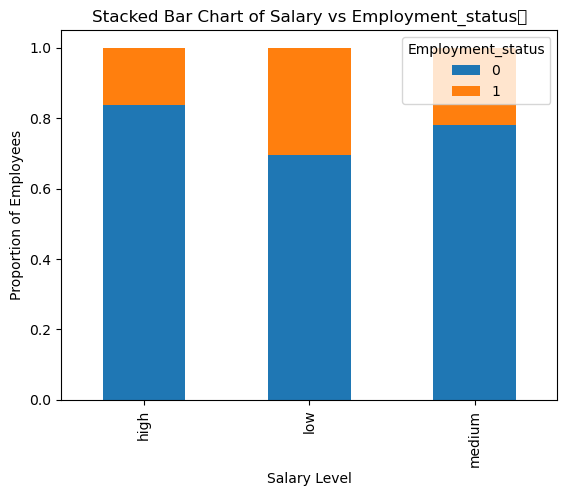

In [12]:
# creation of cross tab
table=pd.crosstab(df.Salary, df.Employment_status)

# creation of proportion [0-1]
table_proportion = table.div(table.sum(1).astype(float), axis=0)

# creation of stacked bar chart
table_proportion.plot(kind='bar',  stacked = True)
plt.title('Stacked Bar Chart of Salary vs Employment_status	')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [13]:
# cross table dpt vs turnover

pd.crosstab(df.Department, df.Employment_status)

# cross table turnover vs salary 
pd.crosstab(df.Salary, df.Employment_status)



Employment_status,0,1
Salary,,
high,1320,257
low,5313,2330
medium,5286,1493


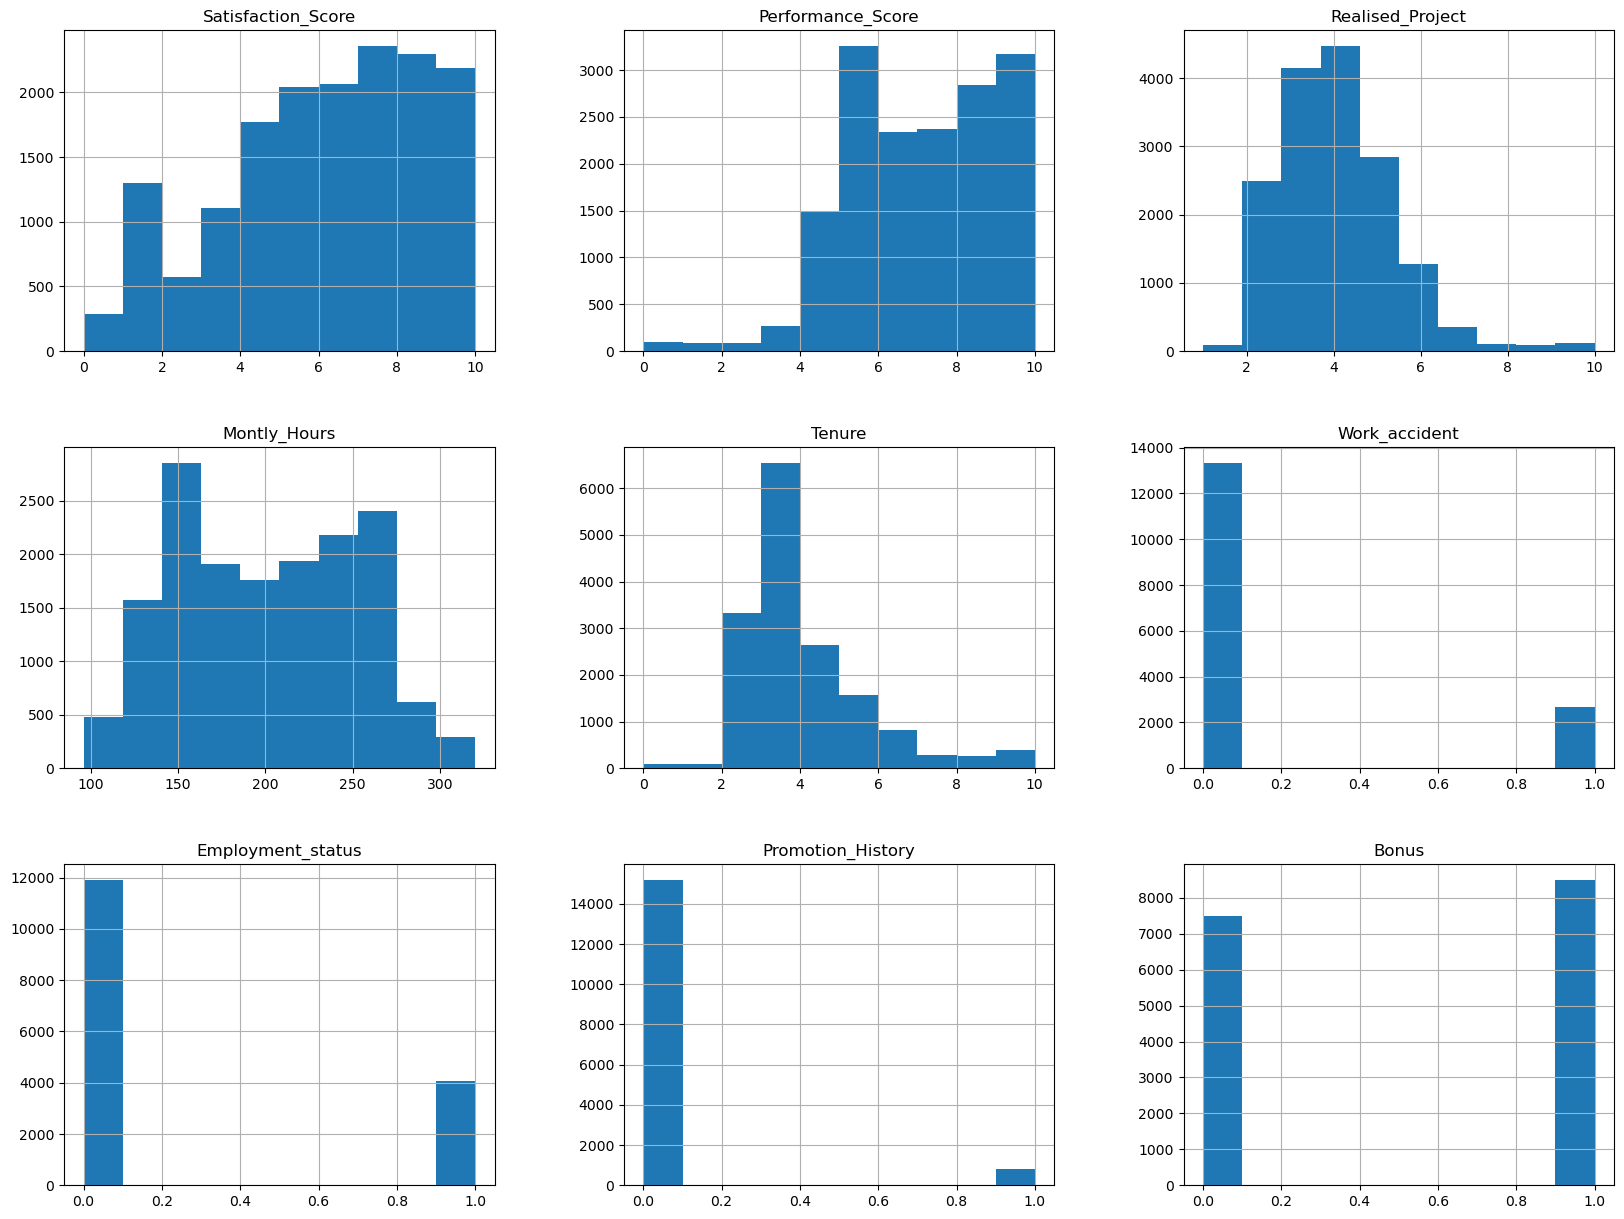

In [14]:
# Histogram


num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

<!-- let's convert categorical data into dummy variables before modelling. to make it less challenging -->

In [15]:
catVariable=['Department','Salary', 'Job_level']
for var in catVariable:
    catList='var'+'_'+var
    catList = pd.get_dummies(df[var], prefix=var)
    df1=df.join(catList)
    df=df1

Removal of actual categorical variable once the dummy variable has been created

In [16]:
df.drop(df.columns[[8, 9, 11]], axis=1, inplace=True)


In [17]:
# display new column of dataset
df.columns.values



array(['Satisfaction_Score', 'Performance_Score', 'Realised_Project',
       'Montly_Hours', 'Tenure', 'Work_accident', 'Employment_status',
       'Promotion_History', 'Bonus', 'Department_IT',
       'Department_Legal_Compliance', 'Department_Logistic',
       'Department_Quality_Assurance', 'Department_RandD',
       'Department_Supply_Chain', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low',
       'Salary_medium', 'Job_level_Entry_Level', 'Job_level_Executive',
       'Job_level_Mid_Level', 'Job_level_Senior_Level'], dtype=object)

In [18]:
# creation of feature X and target y column

df_vars=df.columns.values.tolist()
y=['Employment_status']
X=[i for i in df_vars if i not in y]
a=X

In [19]:
# display of feature column

print(a)


['Satisfaction_Score', 'Performance_Score', 'Realised_Project', 'Montly_Hours', 'Tenure', 'Work_accident', 'Promotion_History', 'Bonus', 'Department_IT', 'Department_Legal_Compliance', 'Department_Logistic', 'Department_Quality_Assurance', 'Department_RandD', 'Department_Supply_Chain', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium', 'Job_level_Entry_Level', 'Job_level_Executive', 'Job_level_Mid_Level', 'Job_level_Senior_Level']


# **Modelling**

In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [21]:
# data split target and feature

cols=a
X=df[cols]
y=df['Employment_status']

print(X)

       Satisfaction_Score  Performance_Score  Realised_Project  Montly_Hours  \
0                     0.9                9.5                 6           304   
1                     0.9                6.2                 6           294   
2                     0.9                8.9                 6           276   
3                     0.9                7.7                 5           275   
4                     0.9                8.7                 7           295   
...                   ...                ...               ...           ...   
15994                 5.0                6.0                 3           316   
15995                 2.0                5.0                 4           154   
15996                10.0                1.0                 2           156   
15997                 8.0                4.0                 3           122   
15998                 4.0                1.0                 8           199   

       Tenure  Work_accident  Promotion

 you can see we have 15999 row of data and 29 columns for our feature data

In [22]:
# splitting into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## ** K-Nearest Neighbor (KNN)**

In [23]:
# CODE

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

# create an objet of the model

knn = neighbors.KNeighborsClassifier()

# fit the model

knn.fit(X_train,y_train)

# checking the score

knn.score(X_test,y_test)

0.9229166666666667

In [24]:
# testing value of K


k_values = range(1,10)

 
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    target_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')



Accuracy of model with k = 1: 0.9325

Accuracy of model with k = 2: 0.938125

Accuracy of model with k = 3: 0.925625

Accuracy of model with k = 4: 0.9297916666666667

Accuracy of model with k = 5: 0.9229166666666667

Accuracy of model with k = 6: 0.9275

Accuracy of model with k = 7: 0.9233333333333333

Accuracy of model with k = 8: 0.9258333333333333

Accuracy of model with k = 9: 0.920625



In [25]:
df.shape

(15999, 30)

## **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [27]:
rf.fit(X_train, y_train)

print('Random Forest Accuracy is: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))


ds = rf.estimators_[1]

# plt.figure(figsize=(50,30), dpi=250)

# plot_tree(ds, fontsize=20,filled=True,feature_names=X.columns)


Random Forest Accuracy is: 0.953


As you can see, Random Forest has the highest accuracy. Let's now cross validate the model

## **CART **

In [28]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model_cart = DecisionTreeClassifier()
# fitting the model

model_cart.fit(X_train, y_train)

# predict
cartPredict = model_cart.predict(X_test)
acc = model_cart.score(X_test,y_test)
print(f'Accuracy score of CART using Geni by default is : {acc}')

# display of the tree  

# plt.figure(figsize=(50,30), dpi=250)
# plot_tree(model_cart, fontsize=20,filled=True,feature_names=X.columns)

Accuracy score of CART using Geni by default is : 0.9433333333333334


#  clustering (Kmeans)

label : [1 0 1 ... 0 1 0] 

centers : [[6.06721444e-01 7.09558563e-01 3.22485366e-01 4.72479229e-01
  3.52360238e-01 1.60625101e-01 3.99548896e-02 2.61156758e-01
  9.84372483e-02 1.17609151e-02 9.02207185e-03 1.09553730e-02
  6.10600934e-02 9.98872241e-03 6.07378766e-02 5.62268407e-02
  4.78492025e-02 7.05654906e-02 7.45932012e-02 8.47430321e-02
  1.77702594e-01 2.26357338e-01 9.84372483e-02 4.73980989e-01
  4.27581763e-01 2.12502014e-01 2.23779604e-01 4.16333634e-16
  5.63718382e-01]
 [6.05205270e-01 6.98537582e-01 3.24232934e-01 4.69821848e-01
  3.63204657e-01 1.69321895e-01 5.67810458e-02 7.02920752e-01
  6.29084967e-02 1.96078431e-02 1.87908497e-02 1.76674837e-02
  4.16666667e-02 1.96078431e-02 3.98284314e-02 3.98284314e-02
  3.40073529e-02 4.28921569e-02 4.48325163e-02 3.69076797e-01
  1.14991830e-01 1.34293301e-01 9.86519608e-02 4.80085784e-01
  4.21262255e-01 2.64910131e-01 2.82271242e-01 4.02369281e-01
  5.04493464e-02]]

 
 cross tab display of our cluster

 
Cluster     0    

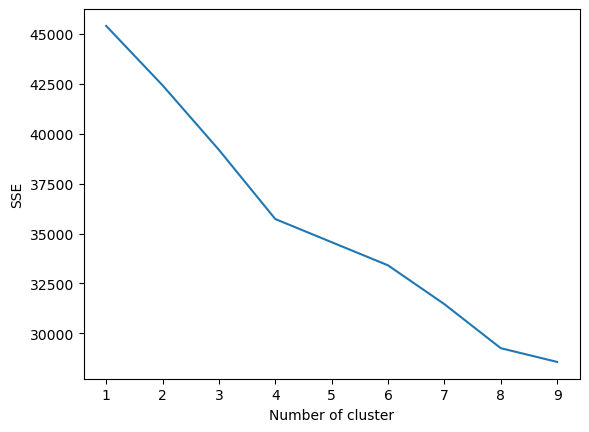

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler 

# Splitting the dataset
attr = X # features
scaler = MinMaxScaler()
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

# model fit 

num_clusters = 2 # leave or stayed
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# cluster detail


print(f'label : {labels} \n')
print(f'centers : {centers}')

# cross tab 

df_cluster=pd.DataFrame({'Actual':y,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print('\n \n cross tab display of our cluster') 
print('\n ')


print(cross_tab)


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(attr)
    attr["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()











## **Precision and Recall**

When an employee left, how often does my classifier predict that correctly?

In [30]:
# random forest precision recall

from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3593
           1       0.94      0.86      0.90      1207

    accuracy                           0.95      4800
   macro avg       0.95      0.92      0.94      4800
weighted avg       0.95      0.95      0.95      4800



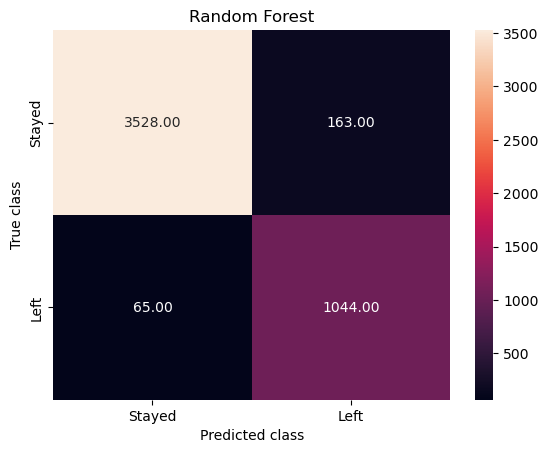

In [31]:
# RF confusion metrics

y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Stayed", "Left"] , yticklabels = ["Stayed", "Left"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [32]:
# CART precision recall


print(classification_report(y_test, model_cart.predict(X_test)))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3593
           1       0.89      0.89      0.89      1207

    accuracy                           0.94      4800
   macro avg       0.92      0.93      0.92      4800
weighted avg       0.94      0.94      0.94      4800



In [33]:
# KNN precision recall


print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3593
           1       0.85      0.84      0.84      1207

    accuracy                           0.92      4800
   macro avg       0.90      0.89      0.89      4800
weighted avg       0.92      0.92      0.92      4800



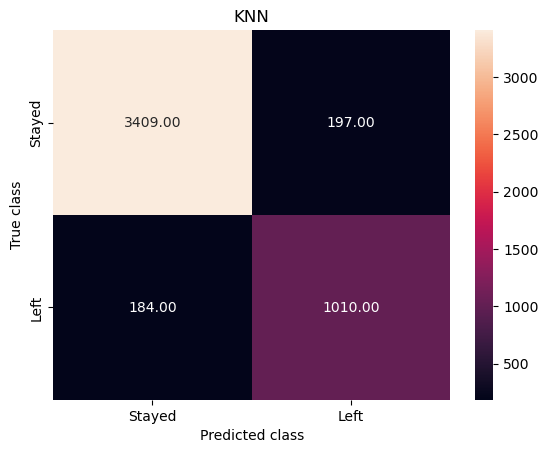

In [34]:
# KNN confusion metrics

cart_y_pred = knn.predict(X_test)
cart_cm = metrics.confusion_matrix(cart_y_pred, y_test)
sns.heatmap(cart_cm, annot=True, fmt='.2f',xticklabels = ["Stayed", "Left"] , yticklabels = ["Stayed", "Left"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('KNN_machine')

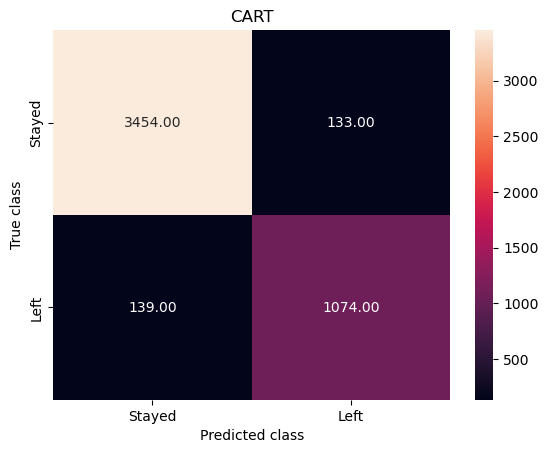

In [35]:
# CART confusion metrics

cart_y_pred = model_cart.predict(X_test)
cart_cm = metrics.confusion_matrix(cart_y_pred, y_test)
sns.heatmap(cart_cm, annot=True, fmt='.2f',xticklabels = ["Stayed", "Left"] , yticklabels = ["Stayed", "Left"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('CART')
plt.savefig('CART_machine')

Out of all the turnover cases, random forest correctly retrieved 991 out of 1038. This translates to a turnover "recall" of about 95% (991/1038), far better than logistic regression (26%) or support vector machines (85%).

***When a classifier predicts an employee will leave, how often does that employee actually leave?***
This measurement is called "precision". Random forest again out preforms the other two at about 95% precision (991 out of 1045) with logistic regression at about 51% (273 out of 540), and support vector machine at about 77% (890 out of 1150).

# **Key factors of employee turnover **

17----Department_marketing-0.20%
18----Department_product_mng-0.21%
14----Department_accounting-0.22%
12----Department_RandD-0.22%
8----Department_IT-0.24%
16----Department_management-0.24%
15----Department_hr-0.30%
20----Department_support-0.45%
21----Department_technical-0.54%
27----Job_level_Mid_Level-0.62%
24----Salary_medium-0.63%
10----Department_Logistic-0.64%
28----Job_level_Senior_Level-0.65%
22----Salary_high-0.67%
19----Department_sales-0.67%
25----Job_level_Entry_Level-0.68%
26----Job_level_Executive-0.70%
7----Bonus-0.81%
23----Salary_low-0.85%
11----Department_Quality_Assurance-0.90%
13----Department_Supply_Chain-0.98%
6----Promotion_History-1.00%
9----Department_Legal_Compliance-1.05%
5----Work_accident-1.16%
1----Performance_Score-12.32%
3----Montly_Hours-14.75%
2----Realised_Project-16.69%
4----Tenure-16.99%
0----Satisfaction_Score-24.63%


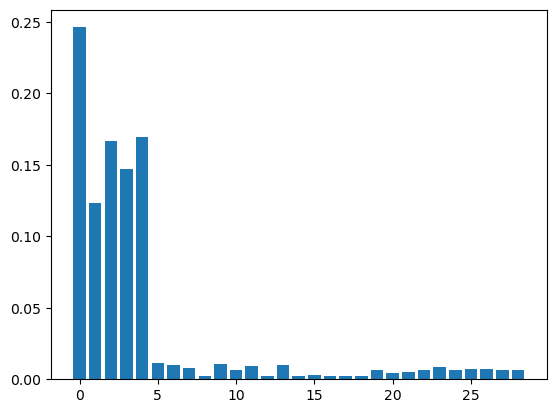

In [ ]:
import numpy as np
feature_labels = np.array(a)
importance = rf.feature_importances_

# sort the result from lowes to the highest
feature_indexes_by_importance = importance.argsort() 

for index in feature_indexes_by_importance:
    print('{}----{}-{:.2f}%'.format(index,feature_labels[index], (importance[index] *100.0)))
    
    
    
    

# creation of bar char

plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Satisfaction_Score-28.41% 